# Importation of libraries

In [45]:
# Standard libraries
import pandas as pd
import numpy as np

# Non-standard Libaries
from DataLoaders.bad_debts import BadDebtsExpense

from FeatureEngineering.credit_sales_eda import CreditSales
from FeatureEngineering.days_sales_outstanding import DSO
from FeatureEngineering.consecutive_years import get_consecutive_years

from Analysis.enrollment_statistics import enrollment_statistics

# B. Loading of datasets

## 1. Revenues

In [46]:
df_revenues = pd.read_excel(r"Database\revenues_pseudonymized.xlsx")

In [47]:
df_revenues

,entry_number,entry_date,due_date,school_year,student_id_pseudonimized,category_name,discount_refund_applied_to,amount_due,amount_paid,account_name,receivables
0,0,2025-10-13,2025-10-13,2014,9XBPS6GQ,Form 137,NaN,150.0,150.0,G-Cash,0.0
1,1,2016-01-01,2016-01-01,2016,QCNXOF71,Back Account,NaN,3524.0,0.0,Not Applicable,3524.0
2,2,2016-01-01,2016-01-01,2016,UFN5RBCA,Back Account,NaN,9831.0,0.0,Not Applicable,9831.0
3,3,2016-01-01,2016-01-01,2016,CATF26JR,Back Account,NaN,9240.0,0.0,Not Applicable,9240.0
4,4,2016-01-01,2016-01-01,2016,TE11Z2LJ,Back Account,NaN,5886.0,0.0,Not Applicable,5886.0
...,...,...,...,...,...,...,...,...,...,...,...
51186,53633,2026-02-11,2026-08-07,2026,0NVPQ4K1,G01-OF-1st,NaN,5467.0,5467.0,Cash,0.0
51187,53634,2026-02-11,2026-12-04,2026,0NVPQ4K1,G01-OF-2nd,NaN,5467.0,0.0,Not Applicable,5467.0
51188,53635,2026-02-11,2027-03-05,2026,0NVPQ4K1,G01-OF-3rd,NaN,5466.0,0.0,Not Applicable,5466.0
51189,53636,2026-02-11,2026-02-11,2026,B5DSEMMK,Assesment Fee,NaN,600.0,600.0,Cash,0.0


## 2. Credit Sales

In [48]:
cs = CreditSales(df_revenues)
df_credit_sales = cs.show_data()

Single due date records: 10022
Multiple due date records: 257


In [49]:
df_credit_sales

,school_year,student_id_pseudonimized,category_name,gross_receivables,amount_discounted,adjustments,credit_sale_amount,due_date,prepayments,30_days,60_days,90_days,120_days,150_days,180_days,180_above,total_payments,adjusted_credit_amount,net_receivables,description
0,2016,CATF26JR,Back Account,9240.0,0.0,0.0,9240.0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9240.0,9240.0,9240.0,0.0,Back Account
1,2016,LI5DFHZ5,Back Account,5650.0,0.0,0.0,5650.0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5650.0,5650.0,5650.0,0.0,Back Account
2,2016,QCNXOF71,Back Account,3524.0,0.0,0.0,3524.0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3524.0,3524.0,3524.0,0.0,Back Account
3,2016,TE11Z2LJ,Back Account,5886.0,0.0,0.0,5886.0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5886.0,5886.0,5886.0,0.0,Back Account
4,2016,UFN5RBCA,Back Account,9831.0,0.0,0.0,9831.0,2016-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9831.0,9831.0,9831.0,0.0,Back Account
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,2025,XRRBY1N0,Surcharge,570.0,0.0,0.0,570.0,2025-10-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570.0,570.0,Surcharge
10275,2025,XRRBY1N0,Surcharge,228.0,0.0,0.0,228.0,2025-11-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,228.0,228.0,Surcharge
10276,2025,XRRBY1N0,Surcharge,114.0,0.0,0.0,114.0,2026-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,114.0,114.0,Surcharge
10277,2025,ZQB34VX6,Tutorial - Regular-Intermediate-HighSchool,6000.0,0.0,0.0,6000.0,2025-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6000.0,6000.0,6000.0,0.0,Tutoring services


## 3. Bad Debts Expense

How BDE is determined:<br>
If previous school year (if current school year is not equal to the max school year of -UE)<br>
AND<br>
if more than 6 months yung ['due date'] vs today()

In [50]:
bde = BadDebtsExpense(df_credit_sales)
df_bde = bde.show_data()
df_bde

,entry_date,due_date,school_year,student_id_pseudonimized,category_name,amount_due,receivables
0,2018-06-30,2018-06-30,2018,UFN5RBCA,Bad Debts Expense,-5000.0,-5000.0
1,2018-10-15,2018-10-15,2018,2R44WHAT,Bad Debts Expense,-760.0,-760.0
2,2018-12-05,2018-12-05,2018,7D1QPCG8,Bad Debts Expense,-5390.0,-5390.0
3,2019-05-02,2019-05-02,2018,KX7J63XK,Bad Debts Expense,-1500.0,-1500.0
4,2019-08-07,2019-08-07,2018,25TKHGLA,Bad Debts Expense,-2000.0,-2000.0
...,...,...,...,...,...,...,...
782,2026-09-02,2026-09-02,2025,ZDC3I53X,Bad Debts Expense,-6167.0,-6167.0
783,2026-09-02,2026-09-02,2025,ZDIQMF64,Bad Debts Expense,-8134.0,-8134.0
784,2026-09-02,2026-09-02,2025,ZHRMZVJR,Bad Debts Expense,-5800.0,-5800.0
785,2026-09-02,2026-09-02,2025,ZSI26BO0,Bad Debts Expense,-4266.0,-4266.0


## 4. Chart of Accounts

In [51]:
df_chart_of_accounts = pd.read_excel(r"Database\chart_of_accounts.xlsx")

In [52]:
df_chart_of_accounts

,strategic_business_unit,account,sub_account,category_name
0,Teaching,Assesment Fees,Regular Fee,Assesment Fee
1,Teaching,Assesment Fees,Special Education,Assesment Fee - SpEd
2,Teaching,Reservation Fees,Regular Fee,Reservation Fee - Regular
3,Teaching,Reservation Fees,Special Education,Reservation Fee - SpEd
4,Teaching,Reservation Fees,Summer,Reservation Fee - Summer
...,...,...,...,...
527,Discounts & Refunds,Discounts,Regular Employee,Discount - Regular Employee
528,Discounts & Refunds,Discounts,Tutorial,Discount - Tutorial
529,Discounts & Refunds,Discounts,Deposit - School Service,Discount - Refundable Deposits
530,Discounts & Refunds,Discounts,Miscellaneous,Discount - Other


## 5. Enrollees

In [53]:
df_enrollees = pd.read_excel(r"Database\enrollees_pseudonymized.xlsx")

In [54]:
df_enrollees

,school_year,student_id_pseudonimized,plan_type,grade_level,enrollment_date,education_level,has_refunded
0,2018,08GNGU9D,Plan - D,G03,2018-06-07,Elementary,No Refund
1,2018,0JWX77BI,Plan - B,SpE,2018-06-07,Special Education,No Refund
2,2018,0LZJ7928,Plan - A,G01,2018-05-18,Elementary,No Refund
3,2018,15RI5SWE,Plan - B,G03,2018-06-06,Elementary,No Refund
4,2018,1IGM0VHQ,Plan - A,G01,2018-05-04,Elementary,No Refund
...,...,...,...,...,...,...,...
2694,2026,YHSVJHFT,Plan - C,SpE,2026-01-30,Special Education,No Refund
2695,2026,YMJ3L6X6,Plan - B,G08,2026-01-19,Junior High,No Refund
2696,2026,YNT1UYY7,Plan - A,SpE,2026-01-31,Special Education,No Refund
2697,2026,Z3FMQ7JI,Plan - A,G05,2026-01-09,Elementary,No Refund


In [55]:
df_enrollees = get_consecutive_years(df_enrollees)
df_enrollees[['student_id_pseudonimized','school_year','consecutive_years']]

,student_id_pseudonimized,school_year,consecutive_years
0,08GNGU9D,2018,1.0
1,0JWX77BI,2018,1.0
2,0LZJ7928,2018,1.0
3,15RI5SWE,2018,1.0
4,1IGM0VHQ,2018,1.0
...,...,...,...
2694,YHSVJHFT,2026,3.0
2695,YMJ3L6X6,2026,2.0
2696,YNT1UYY7,2026,3.0
2697,Z3FMQ7JI,2026,6.0


## 6. Combined dataframe

In [56]:
# Combine bad debts expense to the revenues
# To recognize receivables no longer able for collection
df_all_transactions = pd.concat((df_revenues, df_bde))


df_all_transactions = pd.merge(
    df_all_transactions,
    df_enrollees,
    on=['student_id_pseudonimized', 'school_year'],
    how='inner'
)

In [57]:
df_all_transactions

,entry_number,entry_date,due_date,school_year,student_id_pseudonimized,category_name,discount_refund_applied_to,amount_due,amount_paid,account_name,receivables,plan_type,grade_level,enrollment_date,education_level,has_refunded,consecutive_years
0,37.0,2018-01-01,2018-01-01,2018,40LHRS6H,Back Account,NaN,39220.0,0.0,Cash,39220.0,Plan - A,SpE,2018-01-10,Special Education,No Refund,1.0
1,39.0,2018-01-01,2018-01-01,2018,8G7SRVR6,Back Account,NaN,23939.0,0.0,Cash,23939.0,Plan - D,G03,2018-06-06,Elementary,No Refund,1.0
2,42.0,2018-01-01,2018-01-01,2018,N9XHXBBF,Back Account,NaN,6000.0,0.0,Cash,6000.0,Plan - C,Kn1,2018-06-08,Pre-Elementary,No Refund,1.0
3,46.0,2018-01-01,2018-01-01,2018,36Q9WATE,Back Account,NaN,324.0,0.0,Cash,324.0,Plan - C,G05,2018-06-04,Elementary,No Refund,1.0
4,47.0,2018-01-01,2018-01-01,2018,GMESTNVP,Back Account,NaN,3505.0,0.0,Cash,3505.0,Plan - C,G02,2018-05-24,Elementary,No Refund,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49834,NaN,2026-09-02,2026-09-02,2025,ZDC3I53X,Bad Debts Expense,NaN,-6167.0,NaN,NaN,-6167.0,Plan - B,G09,2025-05-23,Junior High,No Refund,8.0
49835,NaN,2026-09-02,2026-09-02,2025,ZDIQMF64,Bad Debts Expense,NaN,-8134.0,NaN,NaN,-8134.0,Plan - C,SpE,2025-05-31,Special Education,No Refund,4.0
49836,NaN,2026-09-02,2026-09-02,2025,ZHRMZVJR,Bad Debts Expense,NaN,-5800.0,NaN,NaN,-5800.0,Plan - C,G05,2025-04-11,Elementary,No Refund,4.0
49837,NaN,2026-09-02,2026-09-02,2025,ZSI26BO0,Bad Debts Expense,NaN,-4266.0,NaN,NaN,-4266.0,Plan - C,Kn1,2025-05-31,Pre-Elementary,No Refund,1.0


# C. Analysis

## 1. Retention rate

In [58]:
stats = enrollment_statistics(df_enrollees, mode="percent")
stats

,school_year,total_enrolled,new_enrollees_%,1_year_%,2_year_%,3_year_%,4_year_%,5_year_%,6_year_%,7_year_%,8_year_%,9_year_%
0,2018,161,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2019,290,54.482759,54.482759,45.517241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2020,150,20.000000,20.666667,34.666667,44.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2021,197,33.502538,39.086294,13.197970,19.289340,28.426396,0.000000,0.000000,0.000000,0.000000,0.000000
4,2022,446,58.744395,61.883408,14.573991,4.708520,7.623318,11.210762,0.000000,0.000000,0.000000,0.000000
5,2023,477,27.463312,28.092243,45.283019,10.272537,3.144654,4.192872,9.014675,0.000000,0.000000,0.000000
6,2024,441,23.356009,24.263039,20.408163,32.653061,8.616780,2.267574,3.854875,7.936508,0.000000,0.000000
7,2025,415,18.072289,19.518072,18.072289,18.795181,26.746988,6.506024,1.686747,2.168675,6.506024,0.000000
8,2026,95,2.105263,2.105263,13.684211,28.421053,15.789474,24.210526,7.368421,0.000000,3.157895,5.263158


In [59]:
stats = enrollment_statistics(df_enrollees, mode="count")
stats

,school_year,total_enrolled,new_enrollees_count,1_year_count,2_year_count,3_year_count,4_year_count,5_year_count,6_year_count,7_year_count,8_year_count,9_year_count
0,2018,161,161,161,0,0,0,0,0,0,0,0
1,2019,290,158,158,132,0,0,0,0,0,0,0
2,2020,150,30,31,52,67,0,0,0,0,0,0
3,2021,197,66,77,26,38,56,0,0,0,0,0
4,2022,446,262,276,65,21,34,50,0,0,0,0
5,2023,477,131,134,216,49,15,20,43,0,0,0
6,2024,441,103,107,90,144,38,10,17,35,0,0
7,2025,415,75,81,75,78,111,27,7,9,27,0
8,2026,95,2,2,13,27,15,23,7,0,3,5


## 2. How long does people with BDE last before leaving?

In [60]:
df_bde_per_sy = (
    df_bde
    .groupby(["school_year"], as_index=False)
    .agg(bad_debts_expense=("amount_due", "sum"))
)
df_bde_per_sy

,school_year,bad_debts_expense
0,2018,-19850.0
1,2019,-236533.0
2,2020,-26825.0
3,2021,-3500.0
4,2022,-73367.0
5,2023,-261288.0
6,2024,-403681.0
7,2025,-2706831.0


In [61]:
# --- Step 1: Aggregate per school_year + student ---
df_bde_agg = (
    df_bde
    .groupby(["school_year", "student_id_pseudonimized"], as_index=False)
    .agg(bad_debts_expense=("amount_due", "sum"))
)

# --- Step 2: Select only needed columns from df_enrollees ---
df_enr = df_enrollees[["school_year", "student_id_pseudonimized", "consecutive_years"]]

# --- Step 3: Merge aggregated BDE with enrollment info ---
df_merged = pd.merge(
    df_bde_agg,
    df_enr,
    on=["school_year", "student_id_pseudonimized"],
    how="left"   # keeps all BDE records, adds consecutive_years if available
)

In [62]:
# List of students with BDE that were not enrolled or can no longer be reconciled (uses Back Account as the category)
df_merged[df_merged['consecutive_years'].isna()]

,school_year,student_id_pseudonimized,bad_debts_expense,consecutive_years
0,2018,25TKHGLA,-2000.0,NaN
4,2018,LSRHQID7,-2500.0,NaN
5,2018,TUQ59KF9,-2000.0,NaN
6,2018,UFN5RBCA,-5000.0,NaN
7,2019,2045ILKQ,-4670.0,NaN
10,2019,AT41J5NQ,-28151.0,NaN
31,2020,B9ES414A,-500.0,NaN
32,2020,CLXBMPHZ,-5450.0,NaN
33,2020,NRM8Y0DE,-7850.0,NaN
35,2020,TJ1S1FYW,-3725.0,NaN


In [63]:
# --- Step 1: Aggregate the BDE per school_year and per student_id ---
df_bde_agg = (
    df_bde
    .groupby(["school_year", "student_id_pseudonimized"], as_index=False)
    .agg(bad_debts_expense=("amount_due", "sum"))
)

# --- Step 2: Select only needed columns from df_enrollees ---
df_enr = (
    df_enrollees[["school_year", "student_id_pseudonimized", "consecutive_years"]]
)

# --- Step 3: Merge aggregated BDE with enrollment info ---
df_merged = pd.merge(
    df_bde_agg,
    df_enr,
    on=["school_year", "student_id_pseudonimized"],
    how="left"   # keeps all BDE records, adds consecutive_years if available
)

# --- Step 4: Calculate mean consecutive years per school_year ---
df_mean_consec = (
    df_merged
    .groupby("school_year", as_index=False)
    .agg(mean_consecutive_years=("consecutive_years", "mean"))
)

df_mean_consec

,school_year,mean_consecutive_years
0,2018,1.000000
1,2019,1.285714
2,2020,1.666667
3,2021,2.000000
4,2022,2.272727
5,2023,1.823529
6,2024,3.100000
7,2025,3.189516


In [64]:
df_merged['consecutive_years'].mean()

np.float64(2.919753086419753)

c:\Users\rjbel\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 58.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\rjbel\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 52.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


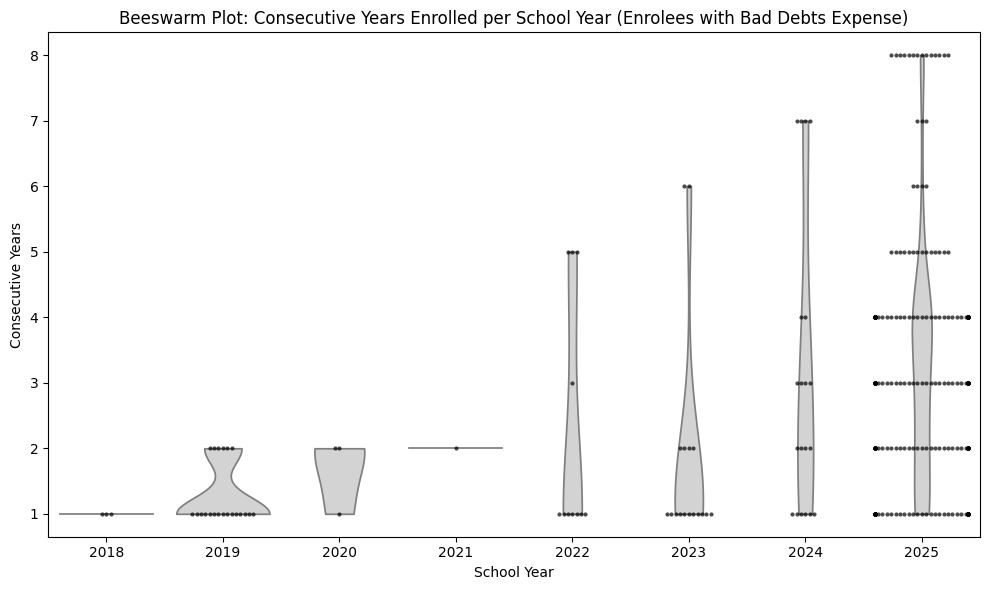

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Base violin plot (distribution shape only, no inner marks)
sns.violinplot(
    data=df_merged,
    x="school_year",
    y="consecutive_years",
    inner=None,   # remove inner bars/points
    color="lightgray",  # neutral background
    cut=0
)

# Overlay swarm plot (the "beeswarm" points)
sns.swarmplot(
    data=df_merged,
    x="school_year",
    y="consecutive_years",
    size=3,   # smaller markers
    alpha=0.7,
    color="black"
)

plt.title("Beeswarm Plot: Consecutive Years Enrolled per School Year (Enrolees with Bad Debts Expense)")
plt.xlabel("School Year")
plt.ylabel("Consecutive Years")
plt.tight_layout()
plt.show()

c:\Users\rjbel\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


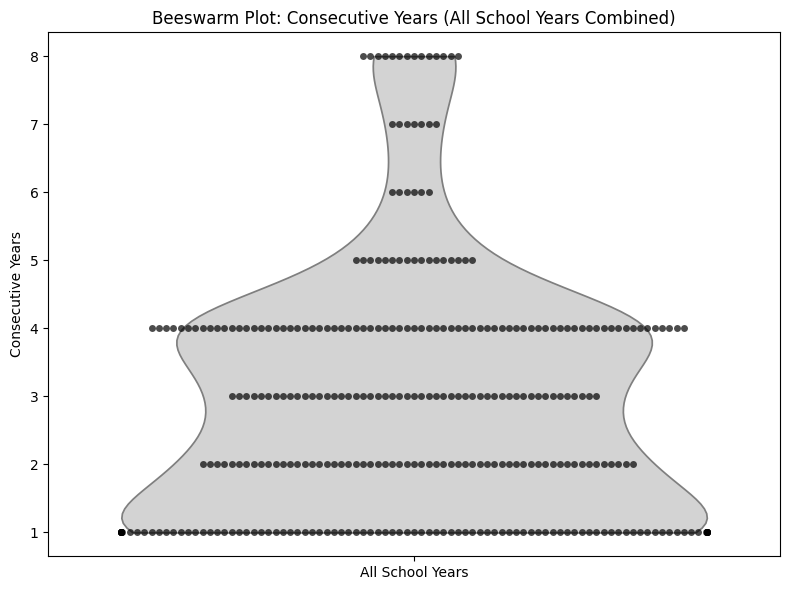

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

# Add a constant category column for clarity
df_merged["all_years"] = "All School Years"

# Base violin plot (distribution shape only, no inner marks)
sns.violinplot(
    data=df_merged,
    x="all_years",
    y="consecutive_years",
    inner=None,        # remove inner bars/points
    color="lightgray", # neutral background
    cut=0
)

# Overlay swarm plot (the "beeswarm" points)
sns.swarmplot(
    data=df_merged,
    x="all_years",
    y="consecutive_years",
    size=5,
    alpha=0.7,
    color="black"
)

plt.title("Beeswarm Plot: Consecutive Years (All School Years Combined)")
plt.xlabel("")  # no need for x-axis label
plt.ylabel("Consecutive Years")
plt.tight_layout()
plt.show()

# Analysis of Days Sales Outstanding (DSO)

$$
DSO = \frac{\text{Average Accounts Receivable}}{\text{Total Credit Sales}} \times \text{Number of Days}
$$

$$
Average Accounts Receivable= \frac{\text{Accounts Receivable, Beginning Balance + Accounts Receivable, Ending Balance}}{\text{2}}
$$

## What is the overall DSO Trend?

In [67]:
dso = DSO(df_all_transactions, df_credit_sales)
df_dso = dso.show_data()
df_dso['year'] = df_dso['date'].dt.year
df_dso['school_year'] = df_dso['year'] -1
df_dso['month'] = df_dso['date'].dt.month

In [68]:
# Filter rows where month == June (6) since July is the end of the enrollment period
df_dso_yearly = df_dso[df_dso['date'].dt.month == 6]
df_dso_yearly[['year', 'school_year', 'rolling_12m_dso']]

,year,school_year,rolling_12m_dso
5,2018,2017,63.682161
17,2019,2018,177.225471
29,2020,2019,82.472958
41,2021,2020,122.442767
53,2022,2021,36.058077
65,2023,2022,52.886027
77,2024,2023,49.725495
89,2025,2024,38.852285
101,2026,2025,75.128485


In [69]:
df_dso.to_excel("DSO.xlsx", index=False)

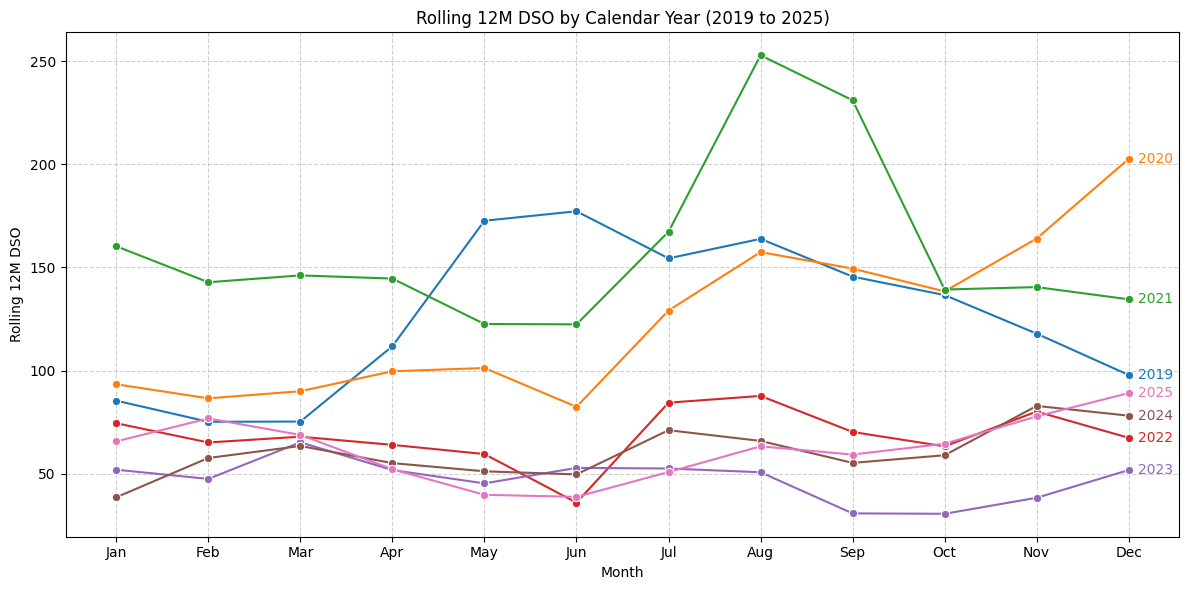

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out 2016, 2017, 2018, 2026
df_plot = df_dso[~df_dso['year'].isin([2016, 2017, 2018, 2026, 2027])]

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_plot,
    x='month',
    y='rolling_12m_dso',
    hue='year',
    marker='o',
    palette='tab10',
    legend=False   # remove legend
)

# Grab the line objects in the same order seaborn plotted them
lines = ax.get_lines()
years = sorted(df_plot['year'].unique())  # ensure consistent ordering

# Add labels at the last entry of each year
for line, year in zip(lines, years):
    group = df_plot[df_plot['year'] == year]
    last_point = group.loc[group['date'].idxmax()]  # last available date for that year
    plt.text(
        x=last_point['month'] + 0.1,   # small offset to the right
        y=last_point['rolling_12m_dso'],
        s=str(year),
        va='center',
        color=line.get_color()  # match line color
    )

# Formatting
plt.title("Rolling 12M DSO by Calendar Year (2019 to 2025)")
plt.xlabel("Month")
plt.ylabel("Rolling 12M DSO")
plt.xticks(range(1, 13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<b> COMMENTS </b> <br>
As seen, the calendar years 2019 and 2020 is 

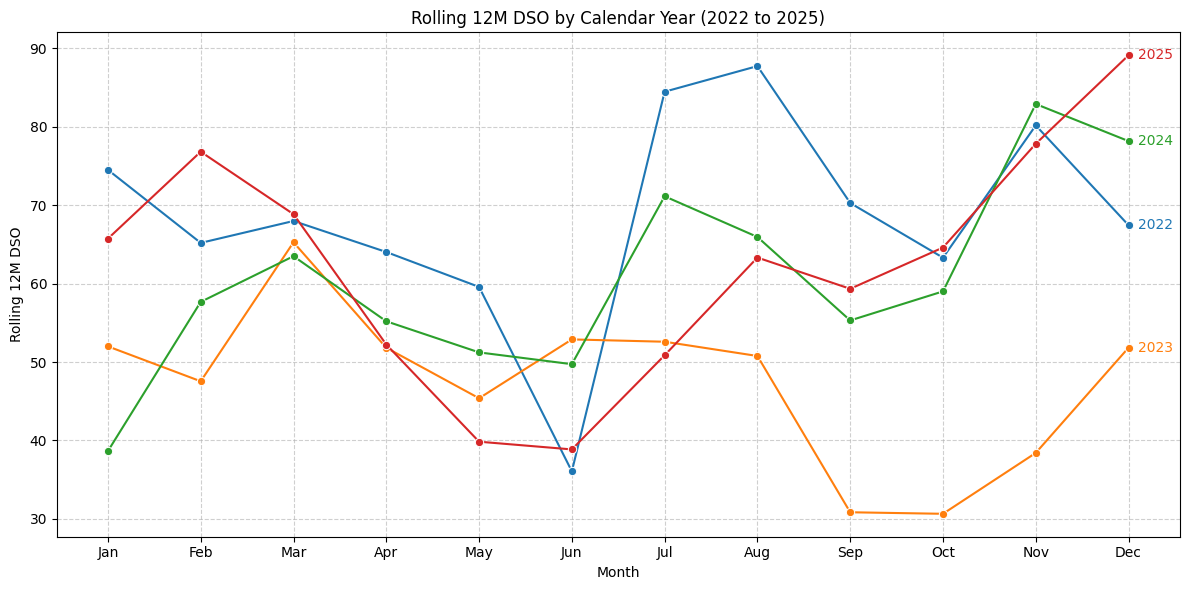

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only 2022–2025
df_plot = df_dso[df_dso['year'].between(2022, 2025)]

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_plot,
    x='month',
    y='rolling_12m_dso',
    hue='year',
    marker='o',
    palette='tab10',
    legend=False   # remove legend
)

# Grab the line objects in the same order seaborn plotted them
lines = ax.get_lines()
years = sorted(df_plot['year'].unique())

# Add labels at the last entry of each year
for line, year in zip(lines, years):
    group = df_plot[df_plot['year'] == year]
    last_point = group.loc[group['date'].idxmax()]  # last available date for that year
    plt.text(
        x=last_point['month'] + 0.1,   # small offset to the right
        y=last_point['rolling_12m_dso'],
        s=str(year),
        va='center',
        color=line.get_color()
    )

# Formatting
plt.title("Rolling 12M DSO by Calendar Year (2022 to 2025)")
plt.xlabel("Month")
plt.ylabel("Rolling 12M DSO")
plt.xticks(range(1, 13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\rjbel\AppData\Local\Temp\ipykernel_45008\89672719.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['year_mean'] = df_plot.groupby('year')['rolling_12m_dso'].transform('mean')
C:\Users\rjbel\AppData\Local\Temp\ipykernel_45008\89672719.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['relative_pct'] = (df_plot['rolling_12m_dso'] / df_plot['year_mean']) * 100


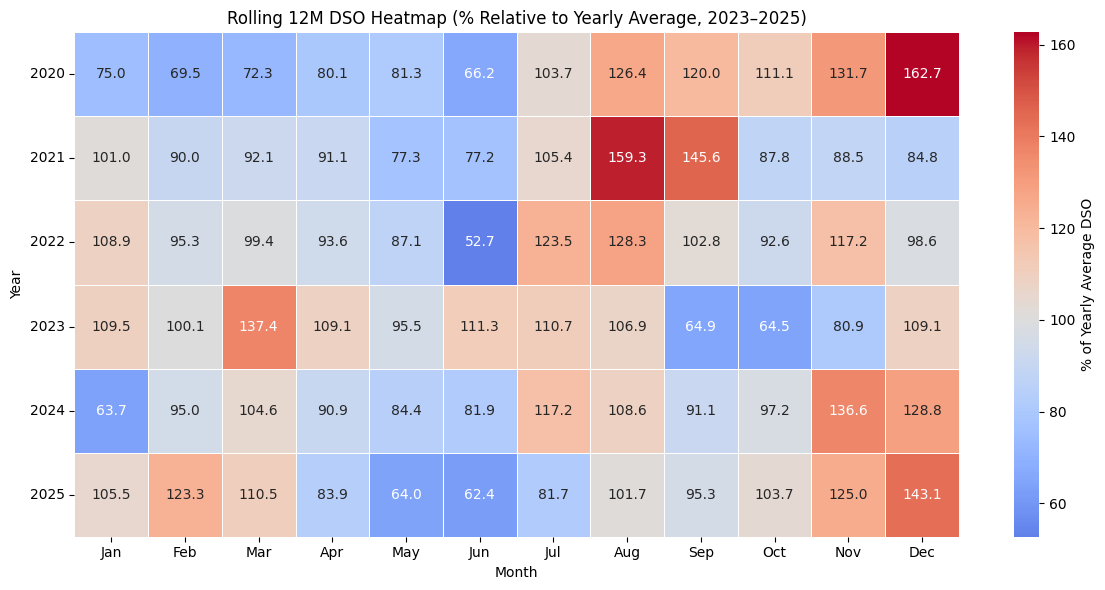

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime
df_dso['date'] = pd.to_datetime(df_dso['date'])

# Extract year and month
df_dso['year'] = df_dso['date'].dt.year
df_dso['month'] = df_dso['date'].dt.month

# Keep only 2023–2025
df_plot = df_dso[df_dso['year'].between(2020, 2025)]

# Compute % relative to same year's average
df_plot['year_mean'] = df_plot.groupby('year')['rolling_12m_dso'].transform('mean')
df_plot['relative_pct'] = (df_plot['rolling_12m_dso'] / df_plot['year_mean']) * 100

# Pivot to Year x Month grid
heatmap_data = df_plot.pivot_table(
    index='year',
    columns='month',
    values='relative_pct',
    aggfunc='mean'
)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap='coolwarm',       # diverging colormap
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    center=100,            # center at 100% (the yearly average)
    cbar_kws={'label': '% of Yearly Average DSO'}
)

# Formatting
plt.title("Rolling 12M DSO Heatmap (% Relative to Yearly Average, 2023–2025)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(
    ticks=[i+0.5 for i in range(12)], 
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    rotation=0
)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

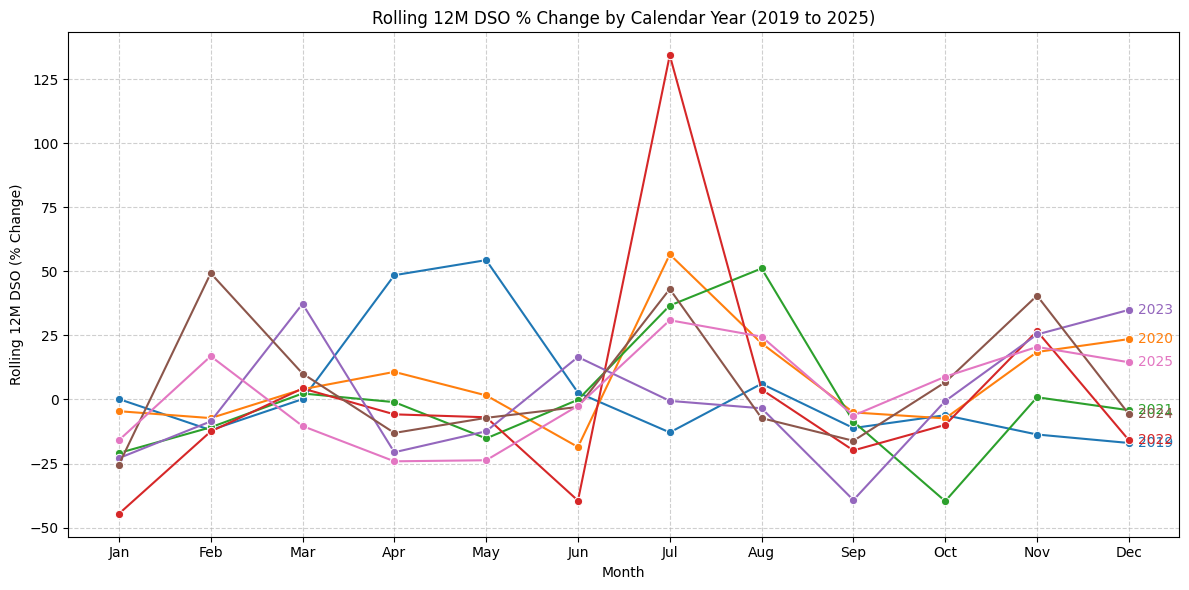

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime
df_dso['date'] = pd.to_datetime(df_dso['date'])

# Extract year and month
df_dso['year'] = df_dso['date'].dt.year
df_dso['month'] = df_dso['date'].dt.month

# Filter out 2016, 2017, 2018, 2026, 2027
df_plot = df_dso[~df_dso['year'].isin([2016, 2017, 2018, 2026, 2027])]

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_plot,
    x='month',
    y='rolling_12m_dso_pct_change',
    hue='year',
    marker='o',
    palette='tab10',
    legend=False   # remove 
)

# Grab the line objects in the same order seaborn plotted them
lines = ax.get_lines()
years = sorted(df_plot['year'].unique())  # ensure consistent ordering

# Add labels at the last entry of each year
for line, year in zip(lines, years):
    group = df_plot[df_plot['year'] == year]
    last_point = group.loc[group['date'].idxmax()]  # last available date for that year
    plt.text(
        x=last_point['month'] + 0.1,   # small offset to the right
        y=last_point['rolling_12m_dso_pct_change'],
        s=str(year),
        va='center',
        color=line.get_color()  # match line color
    )

# Formatting
plt.title("Rolling 12M DSO % Change by Calendar Year (2019 to 2025)")
plt.xlabel("Month")
plt.ylabel("Rolling 12M DSO (% Change)")
plt.xticks(range(1, 13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

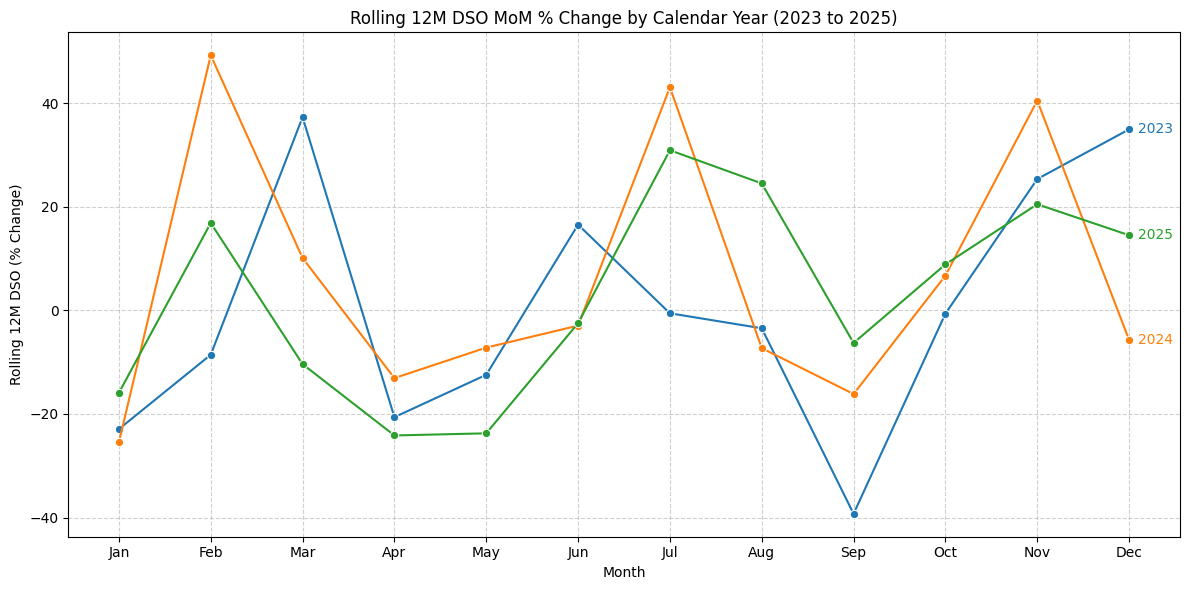

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime
df_dso['date'] = pd.to_datetime(df_dso['date'])

# Extract year and month
df_dso['year'] = df_dso['date'].dt.year
df_dso['month'] = df_dso['date'].dt.month

# Keep only 2022–2025
df_plot = df_dso[df_dso['year'].between(2023, 2025)]

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_plot,
    x='month',
    y='rolling_12m_dso_pct_change',
    hue='year',
    marker='o',
    palette='tab10',
    legend=False   # remove legend
)

# Grab the line objects in the same order seaborn plotted them
lines = ax.get_lines()
years = sorted(df_plot['year'].unique())

# Add labels at the last entry of each year
for line, year in zip(lines, years):
    group = df_plot[df_plot['year'] == year]
    last_point = group.loc[group['date'].idxmax()]  # last available date for that year
    plt.text(
        x=last_point['month'] + 0.1,   # small offset to the right
        y=last_point['rolling_12m_dso_pct_change'],
        s=str(year),
        va='center',
        color=line.get_color()
    )

# Formatting
plt.title("Rolling 12M DSO MoM % Change by Calendar Year (2023 to 2025)")
plt.xlabel("Month")
plt.ylabel("Rolling 12M DSO (% Change)")
plt.xticks(range(1, 13), 
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

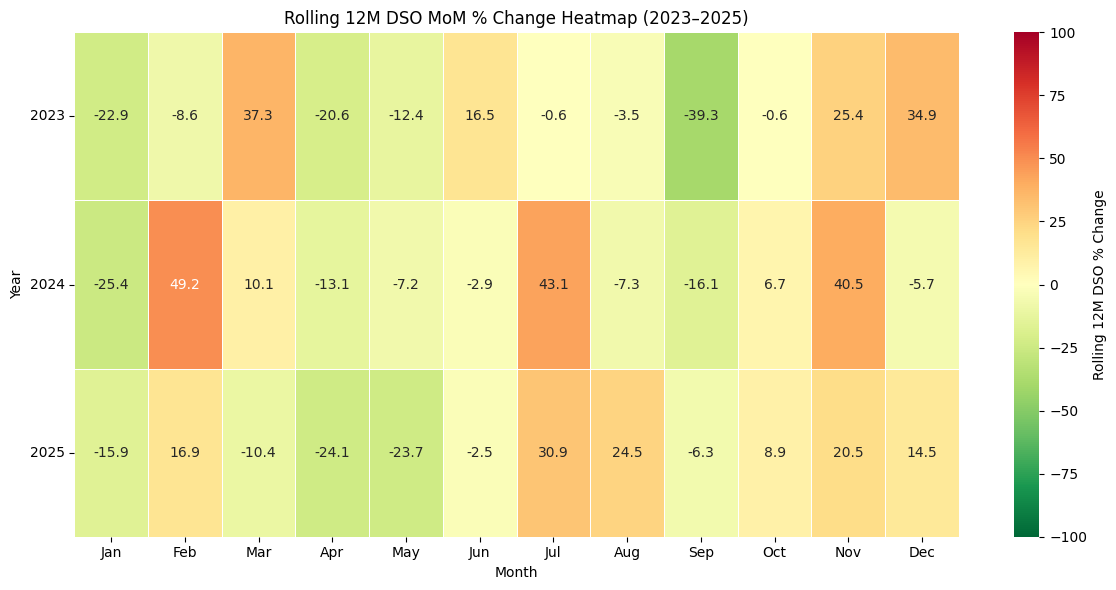

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure datetime
df_dso['date'] = pd.to_datetime(df_dso['date'])

# Extract year and month
df_dso['year'] = df_dso['date'].dt.year
df_dso['month'] = df_dso['date'].dt.month

# Keep only 2023–2025
df_plot = df_dso[df_dso['year'].between(2023, 2025)]

# Pivot to Year x Month grid
heatmap_data = df_plot.pivot_table(
    index='year',
    columns='month',
    values='rolling_12m_dso_pct_change',
    aggfunc='mean'
)

# Plot heatmap with reversed gradient
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap='RdYlGn_r',   # reversed colormap
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    vmin=-100,
    vmax=100,
    center=0,
    cbar_kws={'label': 'Rolling 12M DSO % Change'}
)

# Formatting
plt.title("Rolling 12M DSO MoM % Change Heatmap (2023–2025)")
plt.xlabel("Month")
plt.ylabel("Year")
plt.xticks(
    ticks=[i+0.5 for i in range(12)], 
    labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
    rotation=0
)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## What are the trends per plan type?

In [76]:
df_plan_a = df_all_transactions[df_all_transactions['plan_type'] == 'Plan - A' ]
df_plan_b = df_all_transactions[df_all_transactions['plan_type'] == 'Plan - B' ]
df_plan_c = df_all_transactions[df_all_transactions['plan_type'] == 'Plan - C' ]

if False:
    cs_a = CreditSales(df_plan_a)
    df_cs_a = cs_a.show_data()

    cs_b = CreditSales(df_plan_b)
    df_cs_b = cs_b.show_data()

    cs_c = CreditSales(df_plan_c)
    df_cs_c = cs_c.show_data()


dso_a = DSO(df_plan_a, df_credit_sales)
df_dso_a = dso_a.show_data()
df_dso_a['year'] = df_dso_a['date'].dt.year
df_dso_a['month'] = df_dso_a['date'].dt.month

dso_b = DSO(df_plan_b, df_credit_sales)
df_dso_b = dso_b.show_data()
df_dso_b['year'] = df_dso_b['date'].dt.year
df_dso_b['month'] = df_dso_b['date'].dt.month

dso_c = DSO(df_plan_c, df_credit_sales)
df_dso_c = dso_c.show_data()
df_dso_c['year'] = df_dso_c['date'].dt.year
df_dso_c['month'] = df_dso_c['date'].dt.month

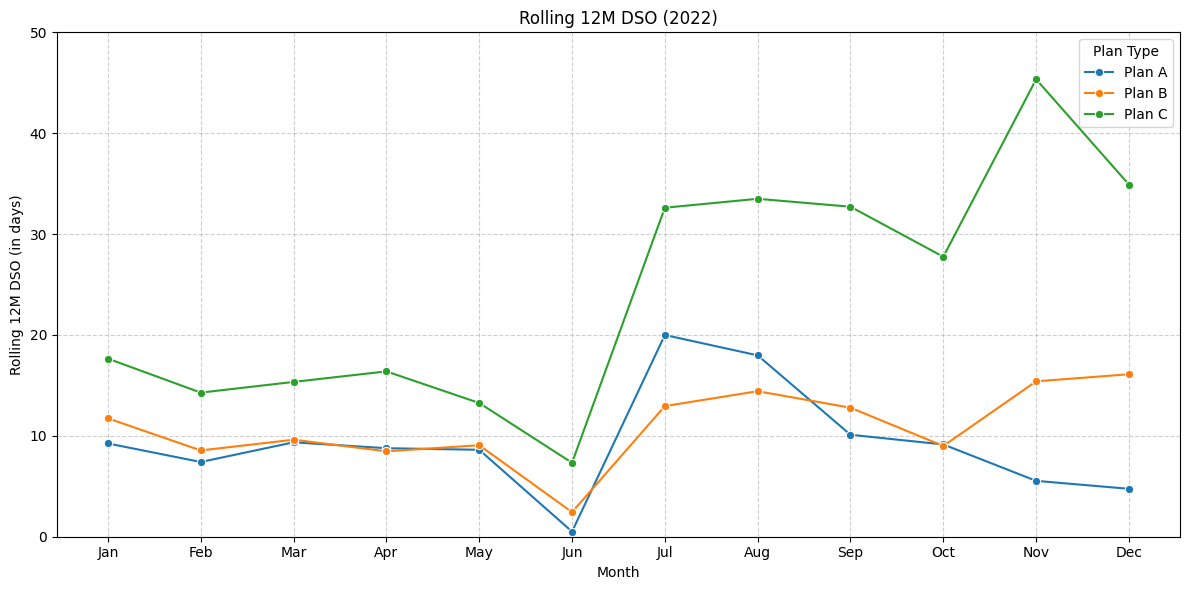

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only 2022
def filter_2022(df):
    return df[(df['year'] == 2022)]

df_a_2023 = filter_2022(df_dso_a).assign(source="Plan A")
df_b_2023 = filter_2022(df_dso_b).assign(source="Plan B")
df_c_2023 = filter_2022(df_dso_c).assign(source="Plan C")

# Combine into one dataframe
df_plot = pd.concat([df_a_2023, df_b_2023, df_c_2023])

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_plot,
    x='month',
    y='rolling_12m_dso',
    hue='source',      # color by plan type
    marker='o'
)

# Rename legend title
ax.legend(title="Plan Type")

# Formatting
plt.title("Rolling 12M DSO (2022)")
plt.xlabel("Month")
plt.ylabel("Rolling 12M DSO (in days)")
plt.xticks(
    range(1, 13),
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.ylim(0, 50)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig(r"Images/dso_per_plan_2022.png", dpi=300, bbox_inches="tight")
plt.show()

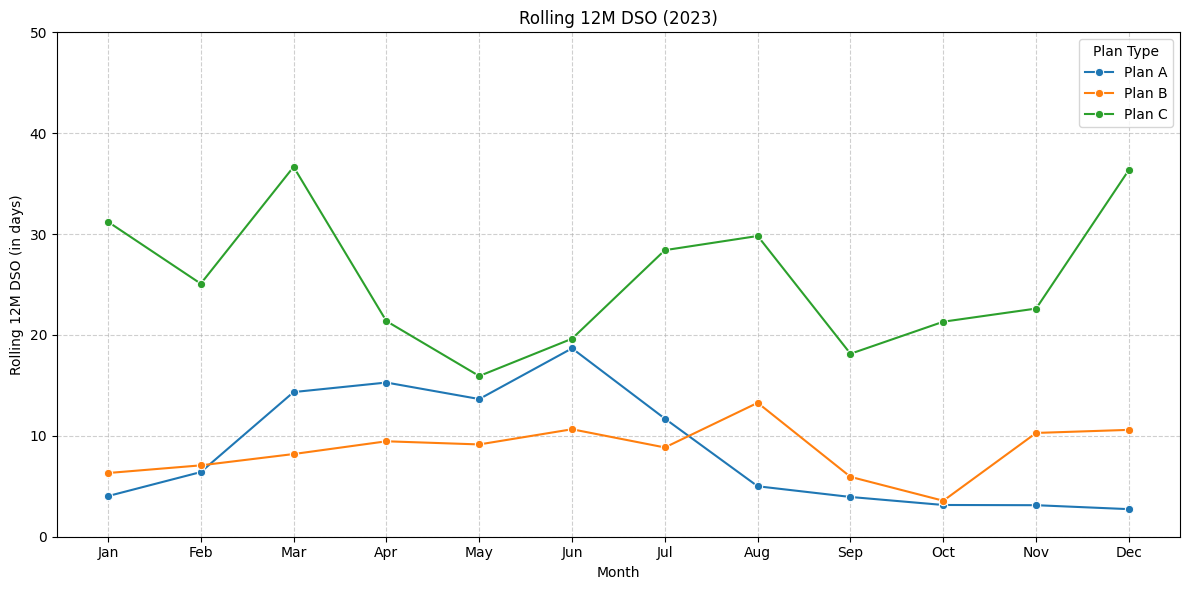

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only 2023
def filter_2023(df):
    return df[(df['year'] == 2023)]

df_a_2023 = filter_2023(df_dso_a).assign(source="Plan A")
df_b_2023 = filter_2023(df_dso_b).assign(source="Plan B")
df_c_2023 = filter_2023(df_dso_c).assign(source="Plan C")

# Combine into one dataframe
df_plot = pd.concat([df_a_2023, df_b_2023, df_c_2023])

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_plot,
    x='month',
    y='rolling_12m_dso',
    hue='source',      # color by plan type
    marker='o'
)

# Rename legend title
ax.legend(title="Plan Type")

# Formatting
plt.title("Rolling 12M DSO (2023)")
plt.xlabel("Month")
plt.ylabel("Rolling 12M DSO (in days)")
plt.xticks(
    range(1, 13),
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.ylim(0, 50)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig(r"Images/dso_per_plan_2023.png", dpi=300, bbox_inches="tight")
plt.show()

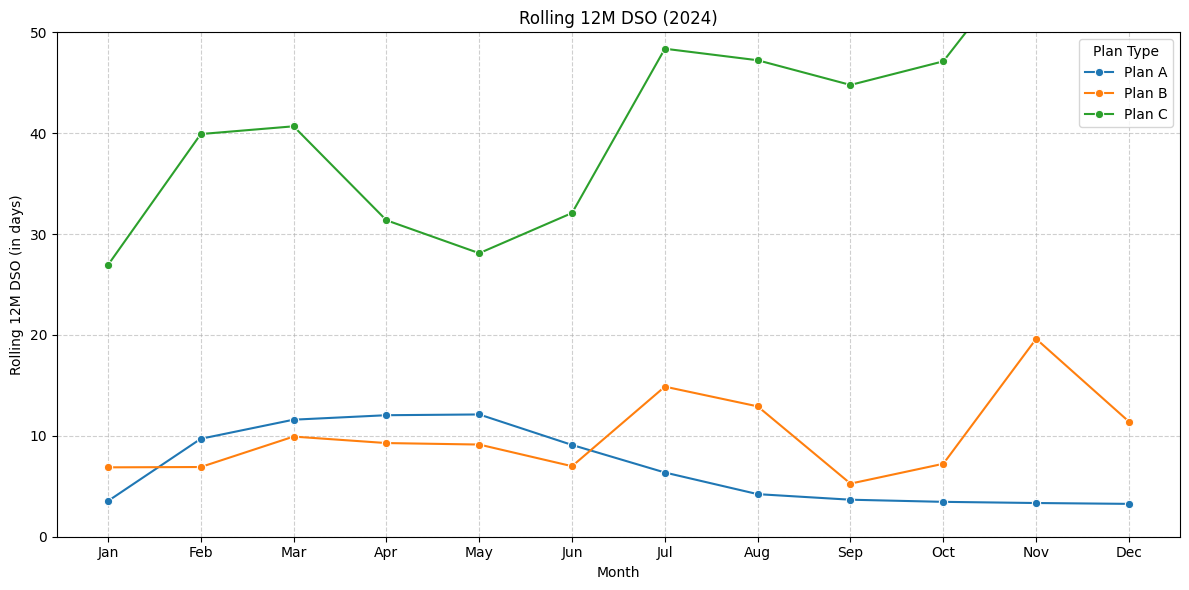

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only 2024
def filter_2024(df):
    return df[(df['year'] == 2024)]

df_a_2024 = filter_2024(df_dso_a).assign(source="Plan A")
df_b_2024 = filter_2024(df_dso_b).assign(source="Plan B")
df_c_2024 = filter_2024(df_dso_c).assign(source="Plan C")

# Combine into one dataframe
df_plot = pd.concat([df_a_2024, df_b_2024, df_c_2024])

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_plot,
    x='month',
    y='rolling_12m_dso',
    hue='source',      # color by plan type
    marker='o'
)

# Rename legend title
ax.legend(title="Plan Type")

# Formatting
plt.title("Rolling 12M DSO (2024)")
plt.xlabel("Month")
plt.ylabel("Rolling 12M DSO (in days)")
plt.xticks(
    range(1, 13),
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
)
plt.ylim(0, 50)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(r"Images/dso_per_plan_2024.png", dpi=300, bbox_inches="tight")
plt.show()

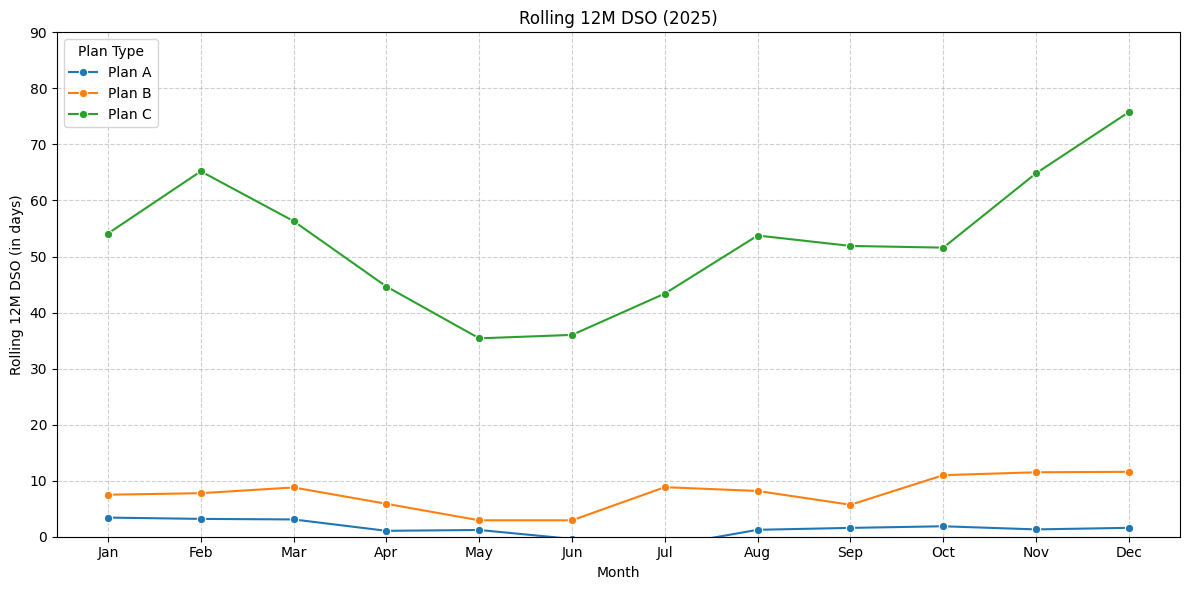

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Keep only 2025 and restrict to Jan–Oct
def filter_2025(df):
    return df[(df['year'] == 2025)]

df_a_2025 = filter_2025(df_dso_a).assign(source="Plan A")
df_b_2025 = filter_2025(df_dso_b).assign(source="Plan B")
df_c_2025 = filter_2025(df_dso_c).assign(source="Plan C")

# Combine into one dataframe
df_plot = pd.concat([df_a_2025, df_b_2025, df_c_2025])

# Plot with seaborn
plt.figure(figsize=(12, 6))
ax = sns.lineplot(
    data=df_plot,
    x='month',
    y='rolling_12m_dso',
    hue='source',      # color by plan type
    marker='o'
)

# Rename legend title
ax.legend(title="Plan Type")

# Formatting
plt.title("Rolling 12M DSO (2025)")
plt.xlabel("Month")
plt.ylabel("Rolling 12M DSO (in days)")
plt.xticks(
    range(1, 13),  # Jan–Sep only
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep', 'Oct', 'Nov', 'Dec']
)
plt.ylim(0, 90)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(r"Images/dso_per_plan_2025.png", dpi=300, bbox_inches="tight")
plt.show()

In [81]:
import pandas as pd

students = df_revenues['student_id_pseudonimized'].unique()

# Collect results in a list
results = []

for student in students:
    curr = df_revenues[df_revenues['student_id_pseudonimized'] == student]
    curr_dso = DSO(curr, df_credit_sales)
    df_curr_dso = curr_dso.show_data()
    filtered_dso = df_curr_dso[df_curr_dso['running_receivable'] < 0]
    
    if not filtered_dso.empty:
        # Add student ID as a column for clarity
        filtered_dso = filtered_dso.copy()
        filtered_dso['student_id_pseudonimized'] = student
        results.append(filtered_dso)

# Concatenate all filtered results into one DataFrame
if results:
    df_output = pd.concat(results, ignore_index=True)
    # Export to Excel
    df_output.to_excel("negative_receivables.xlsx", index=False)

c:\Users\rjbel\Python\Notebooks\Mapua\Thesis\FeatureEngineering\days_sales_outstanding.py:144: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["rolling_12m_dso_pct_change"] = df["rolling_12m_dso"].pct_change() * 100
c:\Users\rjbel\Python\Notebooks\Mapua\Thesis\FeatureEngineering\days_sales_outstanding.py:144: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["rolling_12m_dso_pct_change"] = df["rolling_12m_dso"].pct_change() * 100
c:\Users\rjbel\Python\Notebooks\Mapua\Thesis\FeatureEngineering\days_sales_outstanding.py:144: FutureWarning: The default fill_method='pad' in Seri

In [82]:
df_dso_a

,date,running_receivable,credit_sale,prev_receivable,prev_date,avg_receivable,days_interval,dso_component,rolling_12m_dso,rolling_12m_dso_pct_change,year,month
0,2018-01-31,39639.00,176076.00,NaN,NaT,NaN,NaN,NaN,0.000000,NaN,2018,1
1,2018-02-28,50379.00,10740.00,39639.0,2018-01-31,45009.000,28.0,117.341899,6.745953,inf,2018,2
2,2018-03-31,50379.00,3700.00,50379.0,2018-02-28,50379.000,31.0,422.094324,13.938625,106.622016,2018,3
3,2018-04-30,61039.00,21910.00,50379.0,2018-03-31,55709.000,30.0,76.278868,21.090502,51.309779,2018,4
4,2018-05-31,112108.00,229916.00,61039.0,2018-04-30,86573.500,31.0,11.672865,20.583214,-2.405292,2018,5
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2026-01-31,12860.00,74728.00,11600.0,2025-12-31,12230.000,31.0,5.073466,1.612673,1.686259,2026,1
96,2026-02-28,7770.00,553927.00,12860.0,2026-01-31,10315.000,28.0,0.521404,1.181489,-26.737250,2026,2
97,2026-03-31,6260.00,1447530.00,7770.0,2026-02-28,7015.000,31.0,0.150232,-0.205096,-117.359131,2026,3
98,2026-04-30,5560.00,0.00,6260.0,2026-03-31,5910.000,30.0,inf,0.379118,-284.849056,2026,4


# Analyze the distribution of days payment per invoice

In [83]:
def label_if_on_time(row):
    row['total_late_payments'] = \
        row['30_days'] \
        + row['60_days'] \
        + row['90_days'] \
        + row['120_days'] \
        + row['150_days'] \
        + row['180_days'] \
        + row['180_above']

    if row['net_receivables'] > 0:
        label = "Not Fully Paid Yet"
    elif row['prepayments'] > 0.00 and row['total_late_payments'] == 0.00:
        label = "On Time"
    else:
        label = "Late"

    return label

df_credit_sales['is_on_time'] = df_credit_sales.apply(label_if_on_time, axis=1)

C:\Users\rjbel\AppData\Local\Temp\ipykernel_45008\2250078117.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


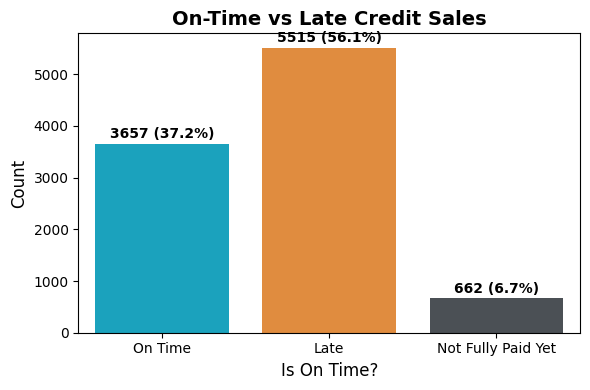

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Filter data
df_cs_already_due = df_credit_sales[df_credit_sales["due_date"] <= datetime.today()]

# Define palette
palette = {
    'On Time': '#00b4d8', # blue
    'Late': '#fb8b24', # red
    'Not Fully Paid Yet': '#495057' # grey
}

# Plot with seaborn (seaborn will count automatically)
plt.figure(figsize=(6,4))
ax = sns.countplot(
    data=df_cs_already_due,
    x='is_on_time',
    palette=palette,
    order=['On Time', 'Late', 'Not Fully Paid Yet']  # fixed order
)

# Compute percentages for annotation
counts = df_cs_already_due['is_on_time'].value_counts()
total = counts.sum()

for i, cat in enumerate(['On Time', 'Late', 'Not Fully Paid Yet']):
    if cat in counts:
        count = counts[cat]
        percent = count / total * 100
        ax.text(i, count + counts.max()*0.01,
                f"{count} ({percent:.1f}%)",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Titles and labels
plt.title("On-Time vs Late Credit Sales", fontsize=14, fontweight='bold')
plt.xlabel("Is On Time?", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

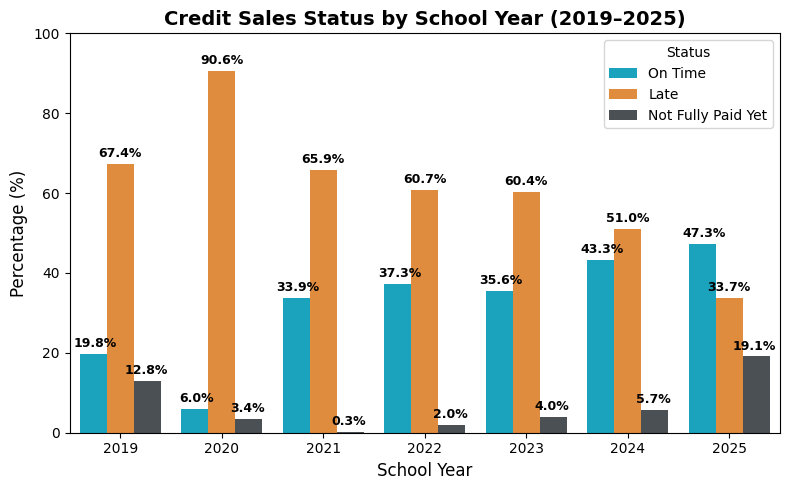

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter for 2019–2025
# Filter not yet due
df_filtered = df_credit_sales[
    (df_credit_sales['school_year'] >= 2019) &
    (df_credit_sales['school_year'] <= 2025) &
    (df_credit_sales['due_date'] <= datetime.today())
]



# Group by school_year and is_on_time
counts = (
    df_filtered
    .groupby(['school_year', 'is_on_time'])
    .size()
    .reset_index(name='count')
)

# Compute percentages within each school_year
counts['percent'] = (
    counts.groupby('school_year')['count']
          .transform(lambda x: x / x.sum() * 100)
)

# Explicit category order
cat_order = ['On Time', 'Late', 'Not Fully Paid Yet']
counts['is_on_time'] = pd.Categorical(counts['is_on_time'], categories=cat_order, ordered=True)

# Define explicit color mapping
palette = {
    'On Time': '#00b4d8', # blue
    'Late': '#fb8b24', # red
    'Not Fully Paid Yet': '#495057' # grey
}

# Plot with percent on y-axis
plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=counts,
    x='school_year',
    y='percent',
    hue='is_on_time',
    hue_order=cat_order,
    palette=palette
)

# Add labels (percentages)
for i, row in counts.iterrows():
    x_pos = list(counts['school_year'].unique()).index(row['school_year'])
    if row['is_on_time'] == 'On Time':
        hue_offset = -0.25
    elif row['is_on_time'] == 'Late':
        hue_offset = 0
    else:
        hue_offset = 0.25
    ax.text(x_pos + hue_offset, row['percent'] + 1,
            f"{row['percent']:.1f}%", 
            ha='center', va='bottom', fontsize=9, fontweight='bold')

# Titles and labels
plt.title("Credit Sales Status by School Year (2019–2025)", fontsize=14, fontweight='bold')
plt.xlabel("School Year", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.legend(title="Status", loc='upper right')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

In [86]:
def label_max_days(row):
    row['total_late_payments'] = \
        row['30_days'] \
        + row['60_days'] \
        + row['90_days'] \
        + row['120_days'] \
        + row['150_days'] \
        + row['180_days'] \
        + row['180_above']

    if row['180_above'] > 0:
        label = "180_above"
    elif row['180_days'] > 0.00:
        label = "180_days"
    elif row['150_days'] > 0.00:
        label = "150_days"
    elif row['120_days'] > 0.00:
        label = "120_days"
    elif row['90_days'] > 0.00:
        label = "90_days"
    elif row['60_days'] > 0.00:
        label = "60_days"
    elif row['30_days'] > 0.00:
        label = "30_days"
    else:
        label = "On-Time"

    return label


# Filter data
df_cs_already_due = df_credit_sales[df_credit_sales["due_date"] <= datetime.today()]
df_cs_already_due['is_on_time'] = df_cs_already_due.apply(label_max_days, axis=1)

df_cs_already_due

C:\Users\rjbel\AppData\Local\Temp\ipykernel_45008\2136714325.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_already_due['is_on_time'] = df_cs_already_due.apply(label_max_days, axis=1)


,school_year,student_id_pseudonimized,category_name,gross_receivables,amount_discounted,adjustments,credit_sale_amount,due_date,prepayments,30_days,...,90_days,120_days,150_days,180_days,180_above,total_payments,adjusted_credit_amount,net_receivables,description,is_on_time
0,2016,CATF26JR,Back Account,9240.0,0.0,0.0,9240.0,2016-01-01,0.0,0.0,...,0.0,0.0,0.0,0.0,9240.0,9240.0,9240.0,0.0,Back Account,180_above
1,2016,LI5DFHZ5,Back Account,5650.0,0.0,0.0,5650.0,2016-01-01,0.0,0.0,...,0.0,0.0,0.0,0.0,5650.0,5650.0,5650.0,0.0,Back Account,180_above
2,2016,QCNXOF71,Back Account,3524.0,0.0,0.0,3524.0,2016-01-01,0.0,0.0,...,0.0,0.0,0.0,0.0,3524.0,3524.0,3524.0,0.0,Back Account,180_above
3,2016,TE11Z2LJ,Back Account,5886.0,0.0,0.0,5886.0,2016-01-01,0.0,0.0,...,0.0,0.0,0.0,0.0,5886.0,5886.0,5886.0,0.0,Back Account,180_above
4,2016,UFN5RBCA,Back Account,9831.0,0.0,0.0,9831.0,2016-01-01,0.0,0.0,...,0.0,0.0,0.0,0.0,9831.0,9831.0,9831.0,0.0,Back Account,180_above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,2025,XRRBY1N0,Surcharge,570.0,0.0,0.0,570.0,2025-10-18,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,570.0,570.0,Surcharge,On-Time
10275,2025,XRRBY1N0,Surcharge,228.0,0.0,0.0,228.0,2025-11-14,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,228.0,228.0,Surcharge,On-Time
10276,2025,XRRBY1N0,Surcharge,114.0,0.0,0.0,114.0,2026-01-06,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,114.0,114.0,Surcharge,On-Time
10277,2025,ZQB34VX6,Tutorial - Regular-Intermediate-HighSchool,6000.0,0.0,0.0,6000.0,2025-07-14,0.0,0.0,...,0.0,0.0,0.0,0.0,6000.0,6000.0,6000.0,0.0,Tutoring services,180_above


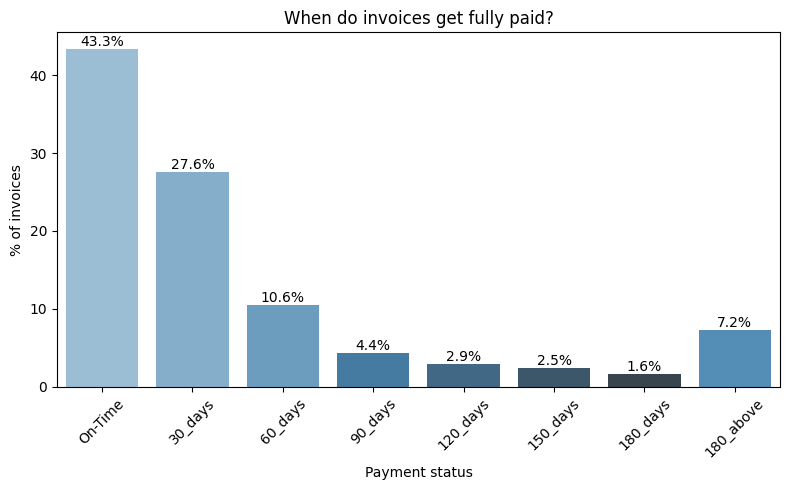

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute counts and percentages
label_counts = df_cs_already_due['is_on_time'].value_counts()
label_percentages = (label_counts / label_counts.sum()) * 100

# Reset index for seaborn
df_plot = label_percentages.reset_index()
df_plot.columns = ['Payment Status', 'Percentage']

# Original order from your if-statements
original_order = [
    "180_above",
    "180_days",
    "150_days",
    "120_days",
    "90_days",
    "60_days",
    "30_days",
    "On-Time"
]

# Reverse the order
reversed_order = list(reversed(original_order))

# Filter to only categories that exist in the data
reversed_order = [label for label in reversed_order if label in df_plot['Payment Status'].values]

# Plot with seaborn
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    data=df_plot,
    x='Payment Status',
    y='Percentage',
    order=reversed_order,
    palette='Blues_d',
    hue='Payment Status'
)

# Add percentage labels on top of bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height(),
        f"{p.get_height():.1f}%",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Formatting
ax.set_ylabel("% of invoices")
ax.set_xlabel("Payment status")
ax.set_title("When do invoices get fully paid?")
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig(r"Images/invoices_payment_status.png", dpi=300, bbox_inches="tight")
plt.show()